## 1. Quá trình ARIMA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('BTC_CSV5.csv')
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,Closing_Price
0,2020-05-21,0.954089
1,2020-05-22,0.914115
2,2020-05-23,0.919285
3,2020-05-24,0.922008
4,2020-05-25,0.904872
...,...,...
362,2021-05-18,4.314447
363,2021-05-19,4.319605
364,2021-05-20,3.943924
365,2021-05-21,3.975609


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

In [5]:
train, test = df[df.index < '2021-01-01'], df[df.index >= '2021-01-01']
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (225, 1)
test shape:  (142, 1)


In [6]:
diff_1 = train.diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 5.314274119928386e-24


In [7]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [8]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-797.404, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-793.785, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-794.158, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-793.914, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-786.071, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-791.051, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-794.529, Time=1.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-792.632, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-792.788, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-793.197, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-798.305, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-787.819, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-788.485, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-796.626, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 402.152
Date:                Mon, 31 May 2021   AIC                           -798.305
Time:                        22:18:26   BIC                           -788.070
Sample:                             0   HQIC                          -794.174
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9949      0.022     45.694      0.000       0.952       1.038
ma.L1         -0.9473      0.047    -20.209      0.000      -1.039      -0.855
sigma2         0.0016   8.77e-05     18.318      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               262.00
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               4.71   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
test['ARIMA'] = arima_model.predict(len(test))

test

<ipython-input-9-a1d8570d7eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA'] = arima_model.predict(len(test))


,Closing_Price,ARIMA
Date,,
2021-01-01,2.911152,2.912109
2021-01-02,2.933361,2.947156
2021-01-03,3.215417,2.982025
2021-01-04,3.300254,3.016717
2021-01-05,3.143161,3.051233
...,...,...
2021-05-18,4.314447,6.378882
2021-05-19,4.319605,6.396343
2021-05-20,3.943924,6.413715


## 2. Quá trình tính phần lỗi

In [11]:
test['Error'] = test['Closing_Price'] -test['ARIMA']

test

<ipython-input-11-6d058dff0578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Error'] = test['Closing_Price'] -test['ARIMA']


,Closing_Price,ARIMA,Error
Date,,,
2021-01-01,2.911152,2.912109,-0.000957
2021-01-02,2.933361,2.947156,-0.013795
2021-01-03,3.215417,2.982025,0.233392
2021-01-04,3.300254,3.016717,0.283536
2021-01-05,3.143161,3.051233,0.091928
...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435
2021-05-19,4.319605,6.396343,-2.076738
2021-05-20,3.943924,6.413715,-2.469791


## 3. Quá trình LSTM

In [13]:
test['Date'] = test.index
test

<ipython-input-13-e1142042d4c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date'] = test.index


,Closing_Price,ARIMA,Error,Date
Date,,,,
2021-01-01,2.911152,2.912109,-0.000957,2021-01-01
2021-01-02,2.933361,2.947156,-0.013795,2021-01-02
2021-01-03,3.215417,2.982025,0.233392,2021-01-03
2021-01-04,3.300254,3.016717,0.283536,2021-01-04
2021-01-05,3.143161,3.051233,0.091928,2021-01-05
...,...,...,...,...
2021-05-18,4.314447,6.378882,-2.064435,2021-05-18
2021-05-19,4.319605,6.396343,-2.076738,2021-05-19
2021-05-20,3.943924,6.413715,-2.469791,2021-05-20


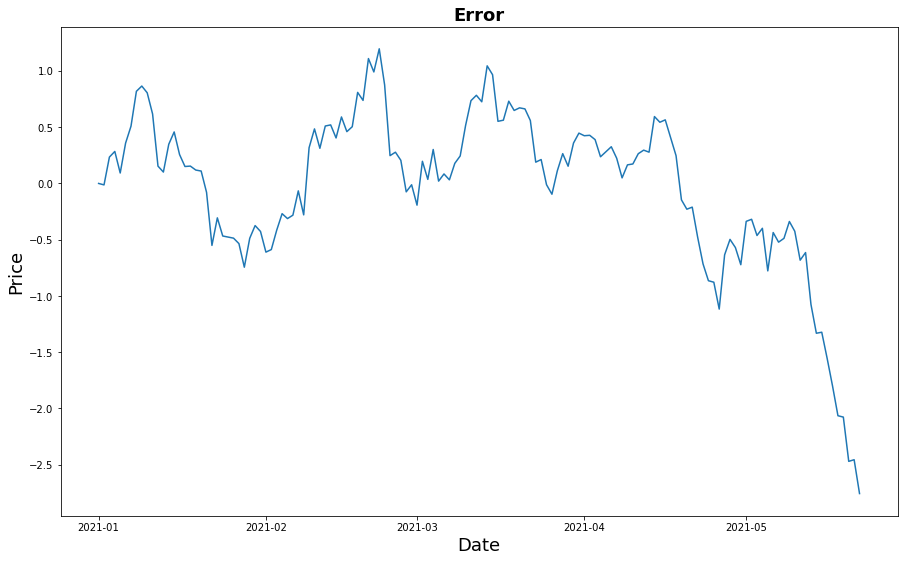

In [16]:
error = test[['Error']]

plt.figure(figsize = (15,9))
plt.plot(error)
plt.title("Error",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [17]:
error = np.array(error)
error

array([[-9.56995765e-04],
       [-1.37954786e-02],
       [ 2.33391695e-01],
       [ 2.83536437e-01],
       [ 9.19278460e-02],
       [ 3.57786188e-01],
       [ 5.07834299e-01],
       [ 8.17615900e-01],
       [ 8.64388868e-01],
       [ 8.04686871e-01],
       [ 6.16292172e-01],
       [ 1.52970869e-01],
       [ 1.00327625e-01],
       [ 3.47595431e-01],
       [ 4.56676376e-01],
       [ 2.55610280e-01],
       [ 1.49657070e-01],
       [ 1.53252303e-01],
       [ 1.18188064e-01],
       [ 1.09298090e-01],
       [-7.98193657e-02],
       [-5.51311703e-01],
       [-3.06590127e-01],
       [-4.67753947e-01],
       [-4.77369080e-01],
       [-4.86935938e-01],
       [-5.35368451e-01],
       [-7.45030001e-01],
       [-4.88258258e-01],
       [-3.75219531e-01],
       [-4.27478935e-01],
       [-6.11066852e-01],
       [-5.88406712e-01],
       [-4.16231687e-01],
       [-2.69411255e-01],
       [-3.13010370e-01],
       [-2.82808055e-01],
       [-6.68710716e-02],
       [-2.8

In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [23]:
look_back = 3
testX, testY = create_dataset(error, look_back)
print(testX.shape)
print(testY.shape)

(138, 3)
(138,)


In [25]:
n_features = 1
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(138, 3, 1)

In [27]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


In [28]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(testX, testY, epochs=300, verbose=1)

Epoch 1/300
5/5 [==============================] - 4s 11ms/step - loss: 0.4939
Epoch 2/300
5/5 [==============================] - 0s 9ms/step - loss: 0.4574
Epoch 3/300
5/5 [==============================] - 0s 7ms/step - loss: 0.3988
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 0.4182
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 0.3602
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 0.3603
Epoch 7/300
5/5 [==============================] - 0s 5ms/step - loss: 0.2620
Epoch 8/300
5/5 [==============================] - 0s 4ms/step - loss: 0.2051
Epoch 9/300
5/5 [==============================] - 0s 4ms/step - loss: 0.2110
Epoch 10/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1128
Epoch 11/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 12/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0770
Epoch 13/300
5/5 [==============================] - 0s 4ms/s

5/5 [==============================] - 0s 4ms/step - loss: 0.0397
Epoch 105/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0387
Epoch 106/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 107/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0417
Epoch 108/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0394
Epoch 109/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0397
Epoch 110/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0430
Epoch 111/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0443
Epoch 112/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0439
Epoch 113/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0409
Epoch 114/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0415
Epoch 115/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0383
Epoch 116/300
5/5 [==============================] - 0

5/5 [==============================] - 0s 4ms/step - loss: 0.0396
Epoch 207/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0391
Epoch 208/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0395
Epoch 209/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 210/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 211/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0361
Epoch 212/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0414
Epoch 213/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 214/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 215/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 216/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 217/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0367
Epoch 218/300
5/5 [==============================] - 0

In [44]:
y_pred= model.predict(testX)


In [47]:
y_pred

(138, 1)

In [46]:
a = len(test)-(look_back+1)
a

138

In [48]:
LSTM_model = test.copy()

In [51]:
LSTM_model = LSTM_model.head(a)

In [53]:
LSTM_model['Error_pred'] = y_pred
LSTM_model

<ipython-input-53-354b02cd5ca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM_model['Error_pred'] = y_pred


,Closing_Price,ARIMA,Error,Date,Error_pred
Date,,,,,
2021-01-01,2.911152,2.912109,-0.000957,2021-01-01,0.249093
2021-01-02,2.933361,2.947156,-0.013795,2021-01-02,0.330069
2021-01-03,3.215417,2.982025,0.233392,2021-01-03,0.144047
2021-01-04,3.300254,3.016717,0.283536,2021-01-04,0.350963
2021-01-05,3.143161,3.051233,0.091928,2021-01-05,0.545042
...,...,...,...,...,...
2021-05-14,4.976413,6.308146,-1.331733,2021-05-14,-1.583655
2021-05-15,5.003269,6.325965,-1.322696,2021-05-15,-1.768327
2021-05-16,4.788563,6.343694,-1.555132,2021-05-16,-2.003871


In [54]:
LSTM_model['ARIMA_LSTM']=LSTM_model['ARIMA']+LSTM_model['Error_pred']
LSTM_model

<ipython-input-54-7351b8eef0f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM_model['ARIMA_LSTM']=LSTM_model['ARIMA']+LSTM_model['Error_pred']


,Closing_Price,ARIMA,Error,Date,Error_pred,ARIMA_LSTM
Date,,,,,,
2021-01-01,2.911152,2.912109,-0.000957,2021-01-01,0.249093,3.161202
2021-01-02,2.933361,2.947156,-0.013795,2021-01-02,0.330069,3.277225
2021-01-03,3.215417,2.982025,0.233392,2021-01-03,0.144047,3.126072
2021-01-04,3.300254,3.016717,0.283536,2021-01-04,0.350963,3.367680
2021-01-05,3.143161,3.051233,0.091928,2021-01-05,0.545042,3.596276
...,...,...,...,...,...,...
2021-05-14,4.976413,6.308146,-1.331733,2021-05-14,-1.583655,4.724491
2021-05-15,5.003269,6.325965,-1.322696,2021-05-15,-1.768327,4.557638
2021-05-16,4.788563,6.343694,-1.555132,2021-05-16,-2.003871,4.339823


In [55]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [56]:
#MAPE
mean_absolute_percentage_error(LSTM_model.Closing_Price, LSTM_model.ARIMA_LSTM)

4.840464866659016

In [57]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(LSTM_model.Closing_Price, LSTM_model.ARIMA_LSTM)

0.2263006135784931

In [58]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(LSTM_model.Closing_Price, LSTM_model.ARIMA_LSTM)

0.08434673477454106

In [73]:
#Dự báo
forecast = LSTM_model['Error'].tail(3)


-2.0644353041915746

In [129]:
dataX = []
for i in range(len(forecast)):
    a=forecast[i]
    dataX.append(a)
dataX = np.array(dataX)
dataX

array([-1.55513157, -1.80087143, -2.0644353 ])

In [132]:
dataX = dataX.reshape(1,-1,1)

In [133]:
dataX

array([[[-1.55513157],
        [-1.80087143],
        [-2.0644353 ]]])

In [134]:
y_forecast= model.predict(dataX)

In [155]:
y_forecast = y_fore
y_forecast

array([[-2.0038717]], dtype=float32)

In [148]:
y_arima = test.copy()
y_arima = y_arima.tail(4).head(1)
y_arima

,Closing_Price,ARIMA,Error,Date
Date,,,,
2021-05-19,4.319605,6.396343,-2.076738,2021-05-19


In [150]:
y_arima['Final_LSTM']=y_arima.ARIMA+y_forecast.reshape(-1,1)

Exception: Data must be 1-dimensional